In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')
pd.set_option('max_column', 30)
# pd.set_option('max_rows', 205)

In [2]:
df = pd.read_csv('/kaggle/input/auto85/auto.csv', header=None)

In [3]:
# specify headers for the dataframe

headers = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_of_doors', 
           'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 
           'height', 'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size', 
           'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
           'city_mpg', 'highway_mpg', 'price']

df.columns = headers

In [ ]:
df.shape

In [ ]:
df.describe(include='all')

In [ ]:
df.dtypes

In [ ]:
df.head()

In [ ]:
df.columns

# Data Pre-processing

In [ ]:
# total number of missing values per column in the dataset
# there are no np.nan values. missing values are represented by the string '?'

df.isna().sum()

In [ ]:
# drop rows with empty string values for price and horsepower and reset the index

df.query('price != "?" and horsepower !="?"', inplace=True)
df.reset_index(drop=True)

In [11]:
#convert type to int 64

df['price'] = pd.to_numeric(df['price'])

In [12]:
# Replace empty string values with NaN 

df.replace('?', np.nan, inplace=True)

In [ ]:
df[['horsepower', 'price']].isna().sum()

In [13]:
# convert datatypes

df['peak_rpm'] = pd.to_numeric(df['peak_rpm'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['compression_ratio'] = pd.to_numeric(df['compression_ratio'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['bore'] = pd.to_numeric(df['bore'])

In [14]:
# convert the data type so the mean can be calculated
df['normalized_losses'] = pd.to_numeric(df['normalized_losses'])

mean = df['normalized_losses'].mean()

# replace the null values with the mean of the series and cast the type as int 64
df['normalized_losses'] = df['normalized_losses'].replace(np.nan, mean).astype('int')


In [15]:
# convert city-mpg to L/100km

# df['city-mpg'] = 235/df['city-mpg']

# rename column

# df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)

**Data Normalization**

In [16]:
# calculate z-score and insert it in the dataframe

#def norm(col):
#    n=stats.zscore(df[col])
#    try:
#        df.insert(df.columns.get_loc(col)+1, 'z_'+col, n)
#    except ValueError:
#        print('z_'+col+' '+'column already exists')

In [17]:
# norm('length')
# norm('width')
# norm('height')

# Data Exploration

In [18]:
df['drive_wheels'].value_counts()

fwd    116
rwd     75
4wd      8
Name: drive_wheels, dtype: int64

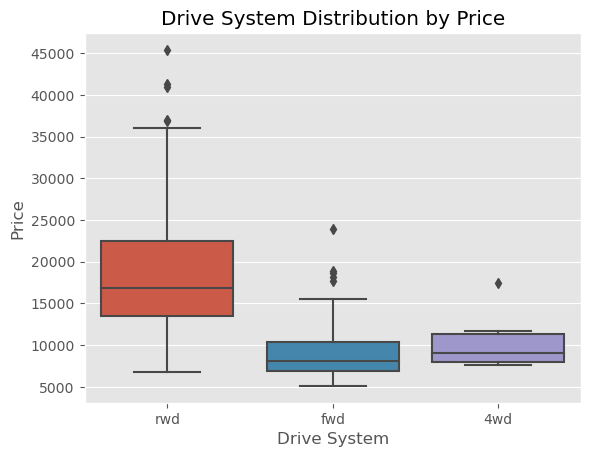

In [19]:
# Drive System Distribution

ax = sns.boxplot(x='drive_wheels', y='price', data=df)
ax.set_title('Drive System Distribution by Price')
ax.set(xlabel='Drive System', ylabel='Price')
plt.show()

**Grouping**

In [ ]:
# average price of cars and how it differs by body style and drive system

df_grp = df.groupby(['drive_wheels', 'body_style'], as_index=False)['price'].mean()

# transform into a pivot table to make it easier to read

df_pivot = df_grp.pivot(index='drive_wheels', columns='body_style')
df_pivot

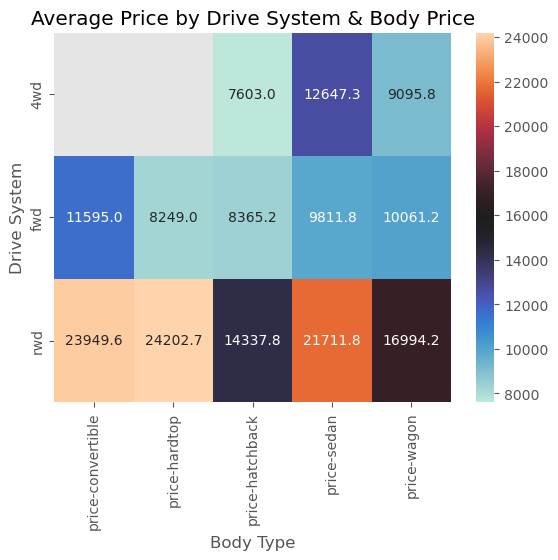

In [21]:
ax = sns.heatmap(df_pivot, cmap='icefire', annot=True, fmt='.1f')
ax.set(xlabel='Body Type', ylabel='Drive System', 
       title='Average Price by Drive System & Body Price')
plt.show()

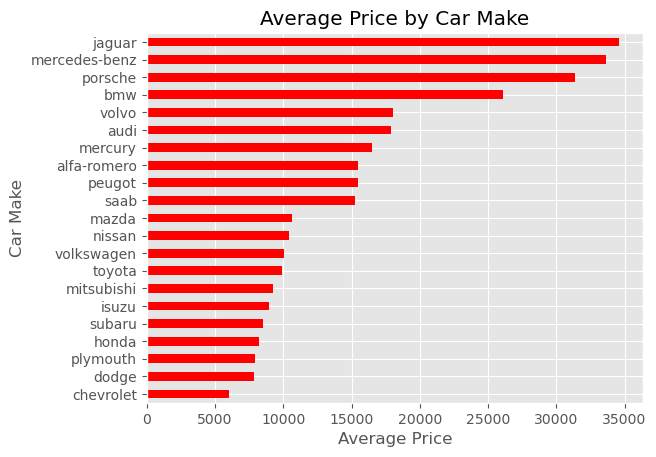

In [36]:
ax = df.groupby('make')['price'].mean().sort_values() \
.plot(kind='barh', color='red', title='Average Price by Car Make')
ax.set_xlabel('Average Price')
ax.set_ylabel('Car Make')
plt.show()

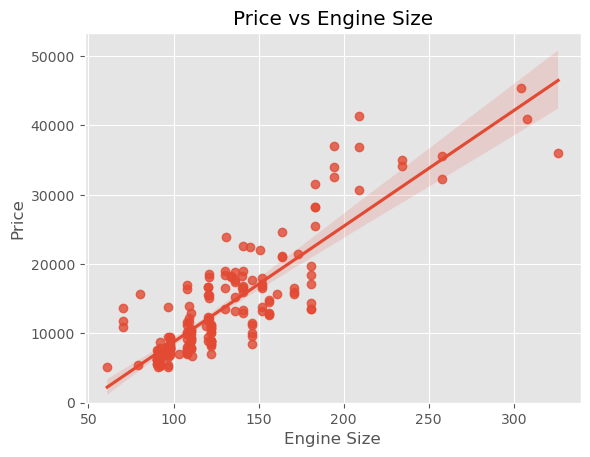

In [23]:
ax = sns.regplot(data=df, x='engine_size', y='price')
plt.ylim(0,)
ax.set(xlabel='Engine Size', ylabel='Price', title='Price vs Engine Size')
plt.show()

# there's positive linear correlation between engine size and price
# engine size can be used as a predictor for price

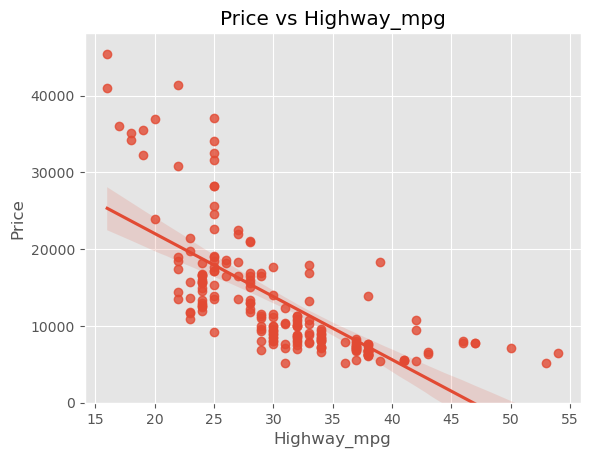

In [24]:
ax = sns.regplot(data=df, x='highway_mpg', y='price')
plt.ylim(0,)
ax.set(xlabel='Highway_mpg', ylabel='Price', title='Price vs Highway_mpg')
plt.show()

# there's negative linear correlation between highway-mpg and price
# highway-mpg can be used as a predictor for price

In [ ]:
# calculate correlation between car features

matrix = df.corr().round(2)
matrix

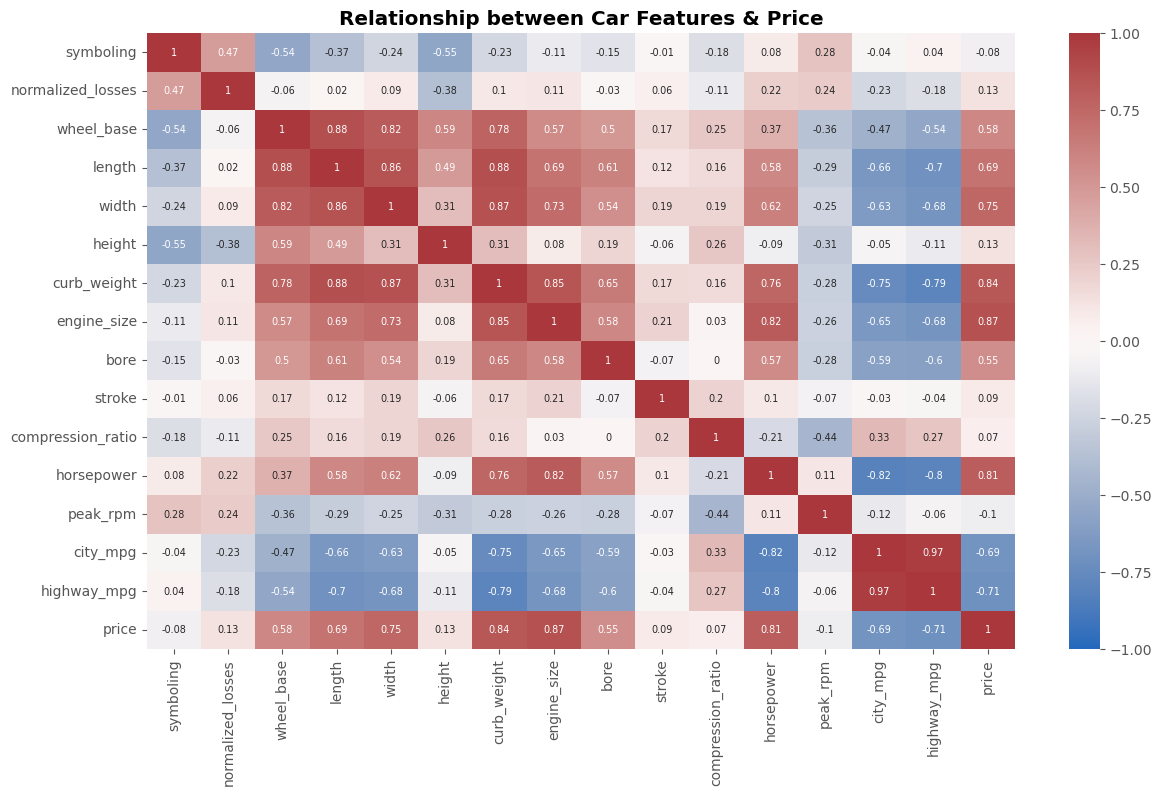

In [26]:
plt.figure(figsize = (14,8))
ax = sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', 
            annot_kws={'size': 'x-small'})
ax.set_title('Relationship between Car Features & Price', weight='bold')
plt.show()

In [27]:
# horsepower, curb weight, engine size and highway mpg have high correlation with price
# these features can be used to predict the price of a car

df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']].isna().sum()

horsepower     0
curb_weight    0
engine_size    0
highway_mpg    0
dtype: int64

In [ ]:
# standardize data by calculating Z-Scores

df2 = df[['horsepower', 'curb_weight', 'engine_size', 'highway_mpg']].apply(stats.zscore)
df2

In [29]:
lm = LinearRegression()
lm.fit(df2, df['price'])

LinearRegression()

In [ ]:
yhat = lm.predict()